In [1]:
import numpy as np
import pandas as pd

In [2]:
path_to_file = 'C:/Users/panka/jupyter_notebook/data/CardioGoodFitness.csv'
df = pd.read_csv(path_to_file)

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
# mean age is 28.78 but median age is 26; median is the age of the 
# average person and the mean is the average age of a person; if you
# sort the data then the middle value is the median. if the there are 
# even number of points, then average of middle 2 data is the median. 

# mean is how much is the per capita income in India and median is the
# income of a typical Indian.

# when median is lower than mean then data is called right skewed i.e
# if mean - median is +ve, then data is right skewed and vice versa 

# standard deviation - how far is every data from the middle. its a measure
# of how spread a typical observation is from average. There is another
# variable called MAD (mean absolute deivation) where instead of squaring
# difference, we take absolute of the difference of current value and mean

# standard deviation is very sensitive to outliers compared to MAD. Larger 
# the deviation, more it blows up. Both are measure of variablility.

# 33 at 75% point - 24 at 25% point = 50% data lies between 24 to 33
# This is call inter-quartile range, which is a difference of data at
# 75% (quarter-3 or upper quartile) and 25% (quarter-1 or lower quartile)
# range = max - min
# interquartile range = upper quartile - lower quartile
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 10.6+ KB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Fitness'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Miles'}>,
        <AxesSubplot:title={'center':'Usage'}>]], dtype=object)

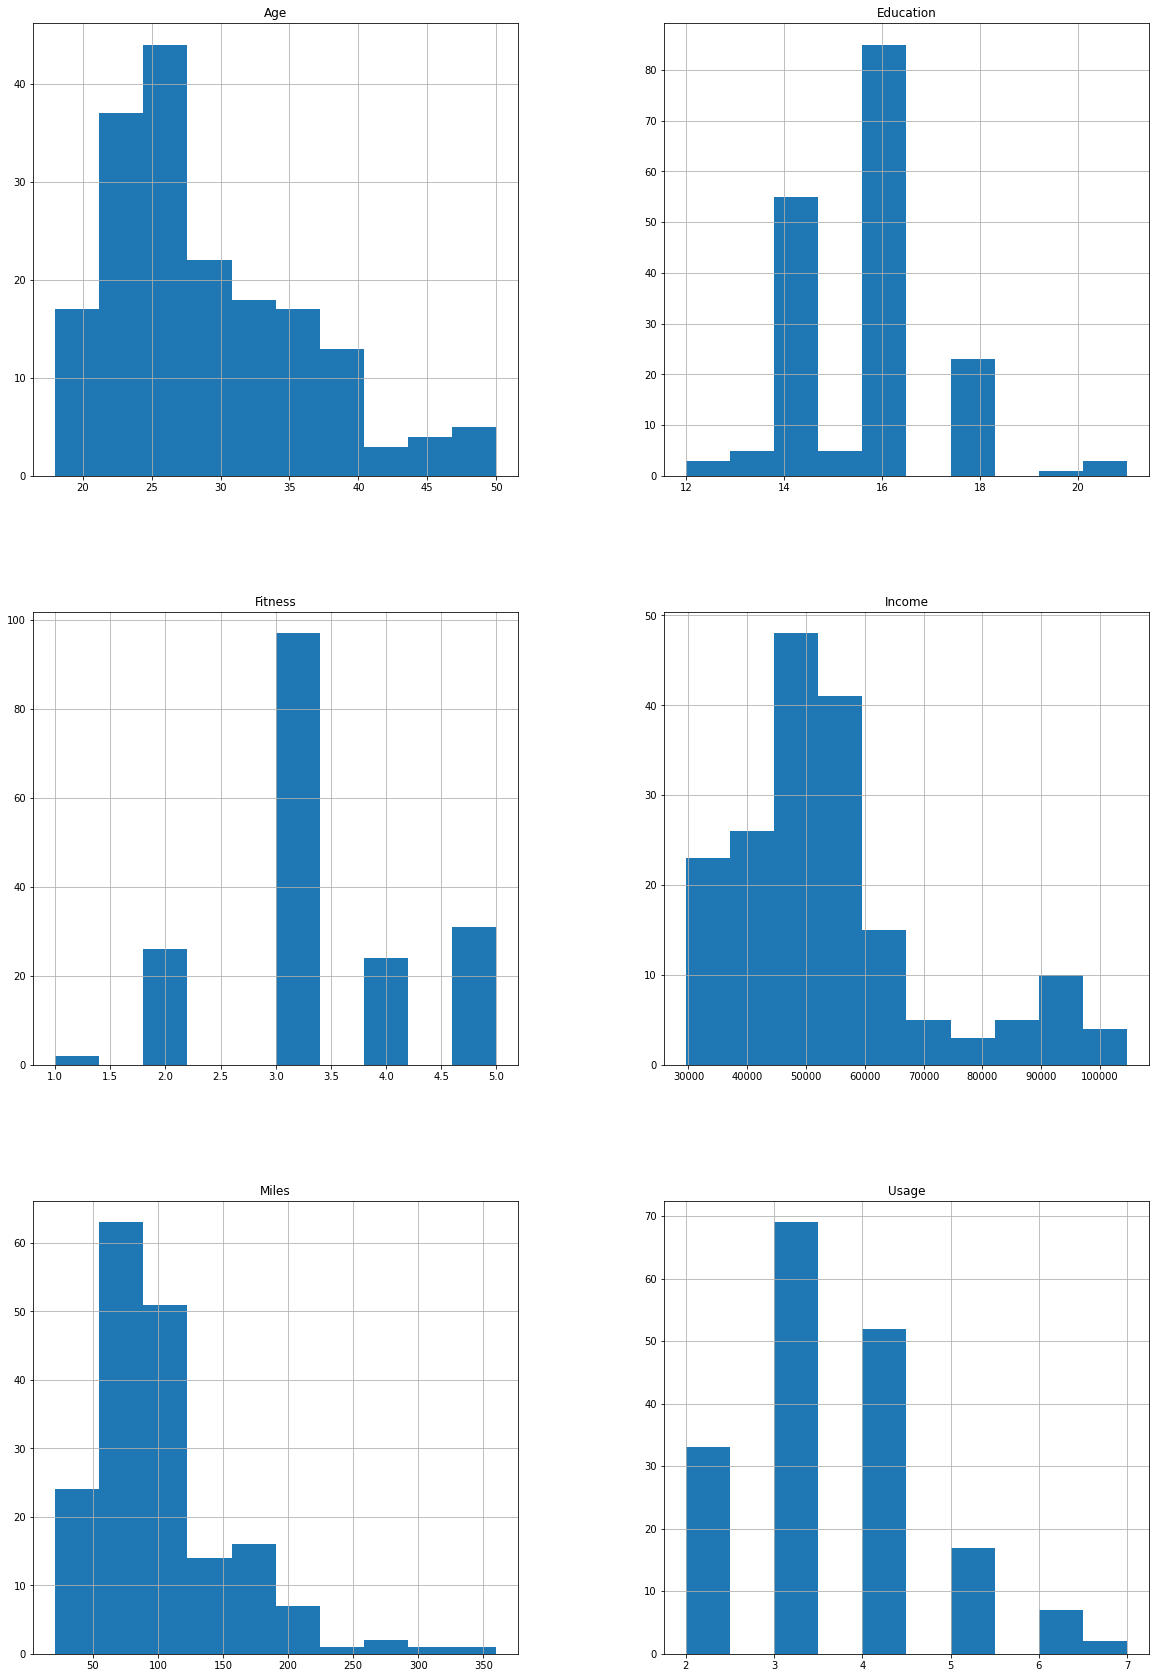

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(20, 30))

<AxesSubplot:xlabel='Gender', ylabel='Age'>

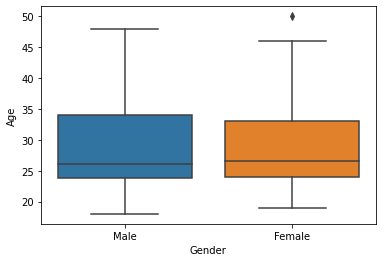

In [7]:
import seaborn as sns

# The box plot used to be called box and whisker plot
# the upper edge of the box is upper quartile and bottom edge of the
# box is lower quartile and a line in between is the median
# the end of the whiskers is 1.5 times the interquartile range above 
# the box

# If a data point lies outside the whisker, it is shown as a point (outlier). 
# and if data ends before it, whisker also ends

# This box plot is also known as 5-point summary

# from the below box-plot, we can also infer that data is right skewed
# as median is closed to the quarte-1
sns.boxplot(x="Gender", y="Age", data=df)

In [8]:
# Creating a simple cross tabulation of 2 factors, This will return
# the frequency table unless array of value or aggregation function is passed
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [9]:
pd.crosstab(df.Product, df.MaritalStatus)

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<AxesSubplot:xlabel='Product', ylabel='count'>

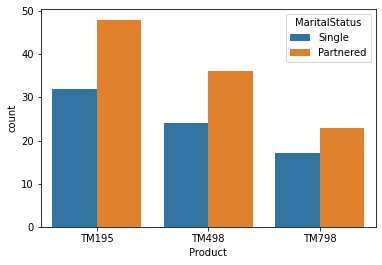

In [10]:
sns.countplot(x='Product', hue='MaritalStatus', data=df)

In [11]:
pd.pivot_table(df, index=['Product', 'Gender'],
              columns=['MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

- In this case age vs age plot does not make sense, so seaborn automatically creates histogram of age

- This plot will ignore the variable of type 'object' such as Gender

- Variable
  - Numerical
  - Categorical
      - Nominal - its a name, eg. 'Gender'
      - Ordinal - its a name, but there is a order, eg. 'Fitness'
- python will treat ordinal variable as a number, but you analyse it as a categorical variable. another eg- zip code

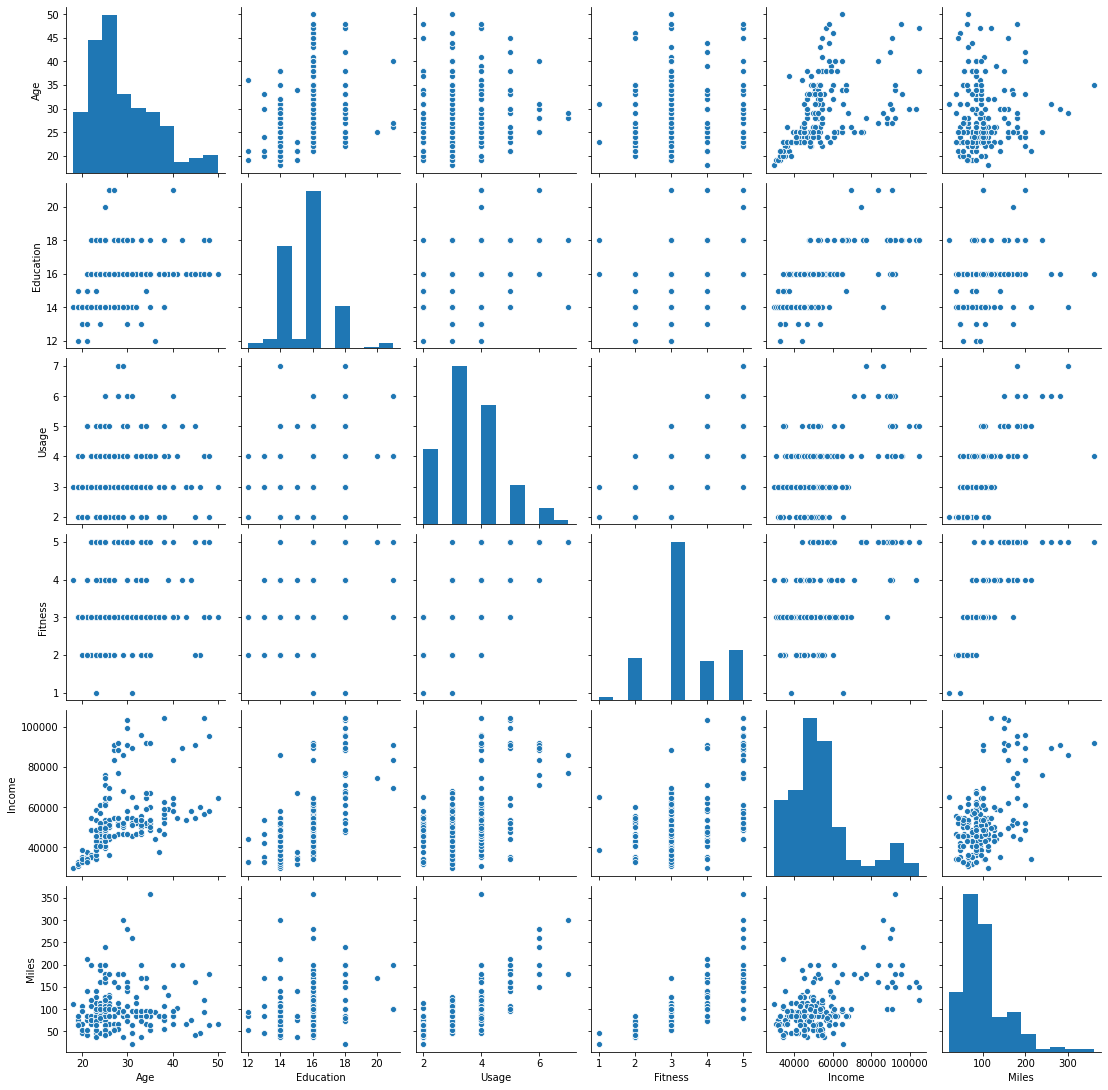

In [12]:
sns.pairplot(df)

- distribution is the first step on doing prediction, as this is the commonality between the data at hand and future data from new customers 

- the idea of a distribution is to be able to abstract away from the data the random part and the systematic part. and the systematic part is the distribution.

- statistical inference is to abstract away from the data certain things that remains the same and some things that do not.

- if you get a correct distribution then the distribution of future data will be very similar from the distribution you get from the old data. and this is how you can predict somethings from the old data. However same is not true for the histograms. This is the main difference between histogram and distribution

- If the normal distribution follows a bell curve, then it is sensible to use mean as its mid-point $\mu$. however if the distribution is skewed then median is better.

<AxesSubplot:xlabel='Age'>

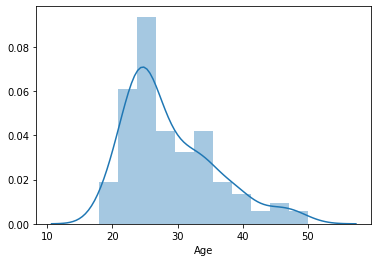

In [13]:
sns.distplot(df.Age)

Distribution Function is:
$$ F(x) = Prob(X <= x) $$

Here $ f(x) $ is derivate of $F(x) $ which is area under curve. This is called density function which is what distplot is plotting. The name distribution function is misleading, mathematically it should be called density function.
$$ f(x) = F'(x) $$


array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

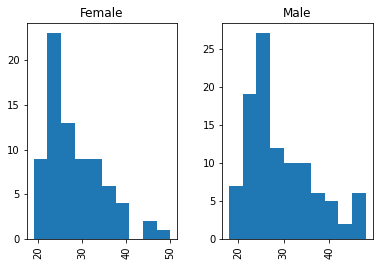

In [14]:
df.hist(by='Gender', column='Age')

- Mode is the highest frequency or the most common value.

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

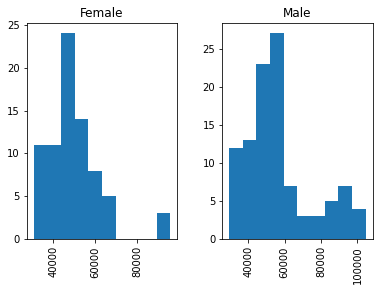

In [15]:
df.hist(by='Gender', column='Income')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

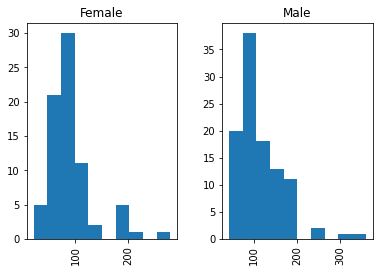

In [19]:
df.hist(by="Gender", column="Miles")

array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

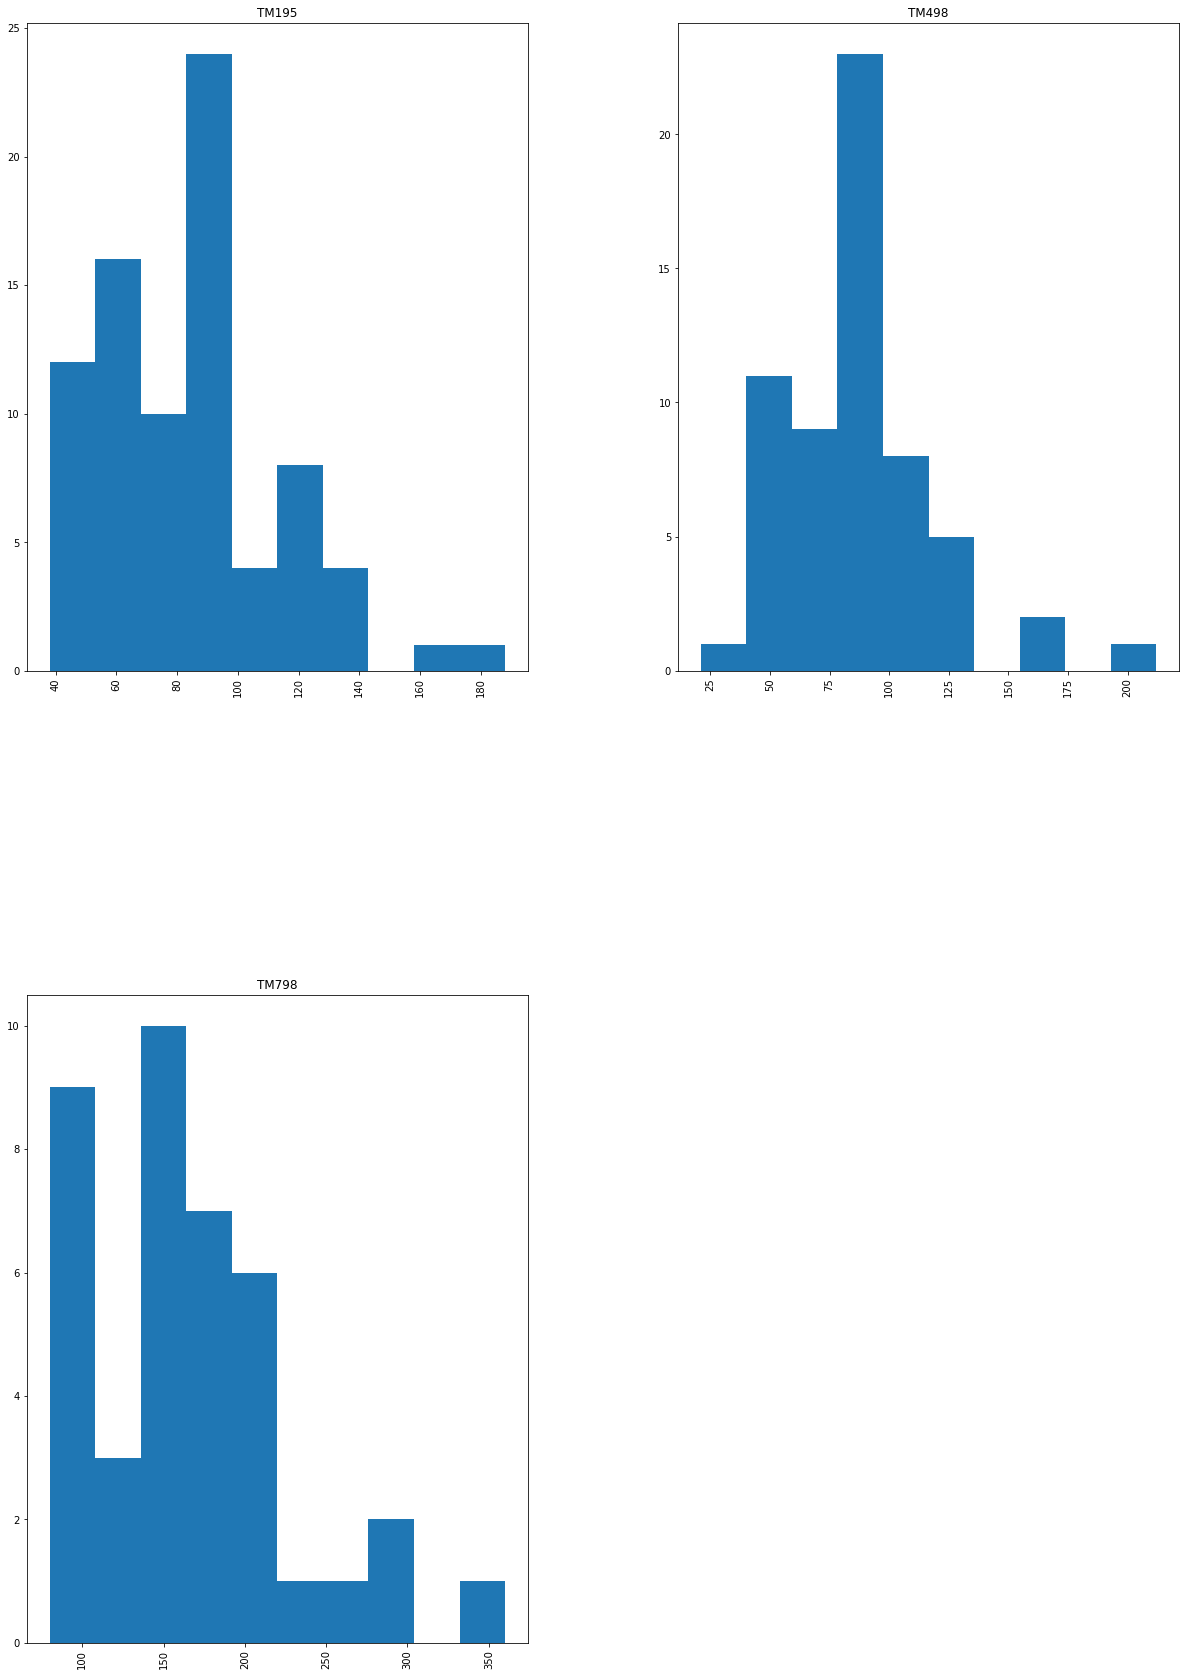

In [20]:
df.hist(by='Product', column='Miles', figsize=(20,30))

### Correlation
Lets $(x_1, y_1) (x_2, y_2) ..... (x_n_y_n)$ are the various points
in a graph. Now Given that $$ \bar{X} = \frac{1}{n} \sum_{1}^{n}{x_i}$$ and $$ \bar{Y} = \frac{1}{n} \sum_{1}^{n}{y_i}$$
$$ \sum_{i}^{n} {(x_i - \bar{x_n})(y_i - \bar{y_n})}$$

Now if a curve have a upward slop than this equation will be positive and we will have a poisitive correlation and similary we will have negative correlation for downward slope.

### Covariance
If we take an average of correlation, then it will be called as covariance.

Covariance of (X, Y):
$$ \frac{1}{n-1}\sum_{i}^{n} {(x_i - \bar{x_n})(y_i - \bar{y_n})}$$

Covariance of (X, X):
$$ \frac{1}{n-1}\sum_{i}^{n} {(x_i - \bar{x_n})^2}$$ which is $ \sigma(X)^2 $, i.e square of standard deviation of X. This is called **Variance of X**

- Implication of Covariance
    - if covariance is positive, x and y is moving in the same direction i.e. greater value of x corresponds to greater value of y
    - if covariance is negative, x and y is moving in the opposite direction i.e. greater value of x corresponds to lower value of y
    - if covariance is zero, x and y is moving in the same direction

Since the covariance is dependent on the unit, value of covariance will depend on the unit being considered. for example, if we take mm instead of km for a variable then the calculated covariance will be very high. to solve this issue, we normalize covariance which is done by dividing the equation by standard deviation of x and y like this:
$$\frac{1}{n-1}\sum_{i}^{n} {\frac{(x_i - \bar{x_n})(y_i - \bar{y_n})}{{\sigma(x)}{\sigma(y)}}}$$ **This is known as correlation**




In [24]:
corr = df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


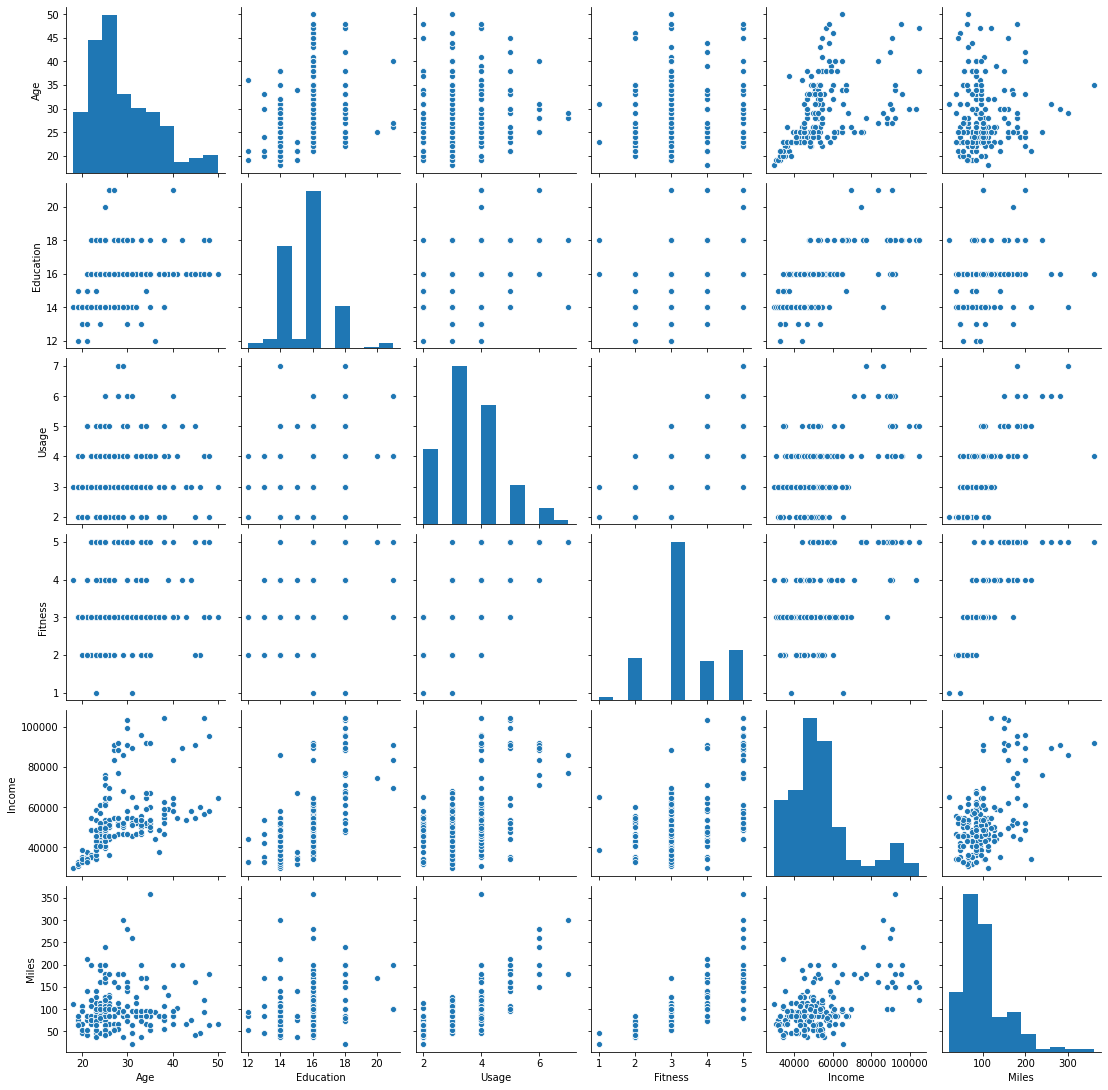

In [22]:
sns.pairplot(df)

<AxesSubplot:>

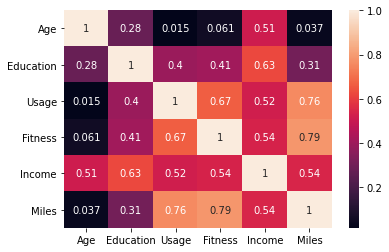

In [25]:
# heat map is better for display when you have 100s or 1000s of variables
sns.heatmap(corr, annot=True)

In [27]:
# Simple linear regression

# load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()


y = df.Miles

# whether people consider themselves fit or not and how frequently they use it
x = df[['Usage', 'Fitness']]

# train the model using the training sets
regr.fit(x, y)

LinearRegression()

In [28]:
regr.coef_

array([20.21486334, 27.20649954])

In [29]:
regr.intercept_

-56.74288178464862

In [ ]:
# MilesPredicted = -56.74 + 20.21 x Usage + 27.20 x Fitness
# This kind of equation is linear regression model. This is predictive analysis
 